Predicting Infinity War: score = ~91, Predicted = 89


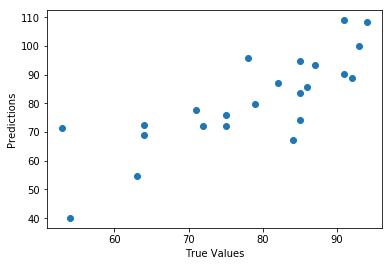

Linear Regression Mean Absolute Error =  [7.67876371]


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

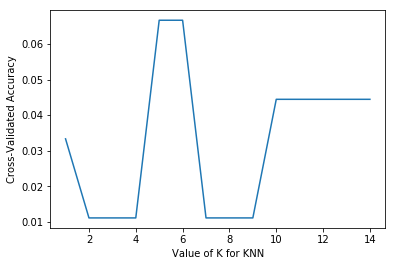

KNN Accuarcy =  66.66666666666667 %


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


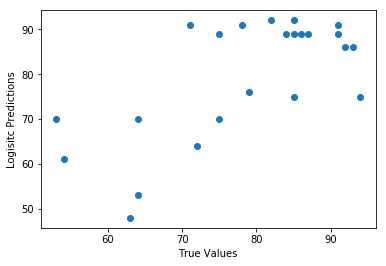

Log Reg Accuarcy =  55.55555555555556 %


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.p

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

#df = pd.read_excel(r"C:\Users\Joel\Documents\Github\MovieData.xlsx")
df = pd.read_excel(r"MovieData.xlsx")

df = pd.DataFrame(df,columns=['Gross USA','Opening Weekend USA','Worldwide Gross','Budget','Metascore','IMDb Rating','Tomatometer','Audience Score'])

X = df[['Gross USA','Opening Weekend USA','Worldwide Gross','Budget','Metascore','IMDb Rating','Tomatometer']]
y = df['Audience Score']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

regr = linear_model.LinearRegression()
model = regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

single = [[678815482, 257698183, 2048709917, 321000000, 68, 8.5, 85]]
singlepred = model.predict(single)
print("Predicting Infinity War: score = ~91, Predicted = %d" % (singlepred))

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
print("Linear Regression Mean Absolute Error = ", mean_absolute_error(y_test, predictions, multioutput='raw_values'))

# search for an optimal value of K for KNN
k_range = list(range(1, 15))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())
#print(k_scores)

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
# Most optimal is with a k = 6

knn = KNeighborsClassifier(n_neighbors=6)
print("KNN Accuarcy = ", (cross_val_score(knn, X, y, cv=3, scoring='accuracy').mean()) * 1000, "%")

logreg = LogisticRegression()
logmodel = logreg.fit(X_train, y_train)
logpreds = logreg.predict(X_test)

plt.scatter(y_test, logpreds)
plt.xlabel("True Values")
plt.ylabel("Logisitc Predictions")
plt.show()
print("Log Reg Accuarcy = ", (cross_val_score(logreg, X, y, cv=3, scoring='accuracy').mean()) * 1000, "%")